In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error




In [10]:
data = pd.read_csv('data/02_data.csv', index_col=0)

data.isna().sum()

med_houseinc_12mon              0
household_public_assistance1    0
gini                            0
total_population                0
state_fips                      0
nflood_total                    0
flood_count_fall                0
flood_count_winter              0
flood_count_spring              0
nflood_2000s                    0
nflood_2010s                    0
flood_dur_hours_median          0
flood_dur_hours_min             0
flood_dur_hours_max             0
zcta                            0
channel_length_km               0
delta_floods                    0
dtype: int64

In [58]:
# keep zcta but remove from modeling data
data.index = data['zcta']

# drop columns not used in model
data_medianinc = data.drop(['zcta', 'household_public_assistance1'], axis=1)
## remove outliers

# data_medianinc = data_medianinc.loc[data_medianinc['nflood_total'] > 0, :] 
data_medianinc = data_medianinc.loc[data_medianinc['med_houseinc_12mon'] < 250000, :] 
# data_medianinc = data_medianinc.loc[data_medianinc['channel_length_km'] < 100, :] 
data_medianinc

,med_houseinc_12mon,gini,total_population,state_fips,nflood_total,flood_count_fall,flood_count_winter,flood_count_spring,nflood_2000s,nflood_2010s,flood_dur_hours_median,flood_dur_hours_min,flood_dur_hours_max,channel_length_km,delta_floods
zcta,,,,,,,,,,,,,,,
35004,76683.0,0.3970,11737.0,1,1,0,0,0,1.0,0.0,1.967213,1.967213,1.967213,64.301,-1.000000
35005,55017.0,0.4291,8194.0,1,3,1,0,0,2.0,1.0,3.442623,1.967213,3.934426,94.617,-0.333333
35006,63521.0,0.3902,3391.0,1,2,0,1,0,0.0,1.0,3.196721,1.967213,4.426230,306.497,1.000000
35007,81351.0,0.3769,27052.0,1,6,1,0,1,1.0,4.0,2.459016,0.983607,8.852459,108.522,0.600000
35010,46730.0,0.4832,20406.0,1,5,0,0,1,2.0,2.0,1.721311,0.983607,8.360656,649.526,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99919,64135.0,0.3842,564.0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000
99921,59219.0,0.4161,1727.0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000
99922,53125.0,0.4217,328.0,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.000000


In [59]:
# split test/train data
s_scaler = MinMaxScaler()
s_scaler.set_output(transform='pandas')

p_scaler = PowerTransformer()
s_scaler.set_output(transform='pandas')

scaler_pipe = Pipeline(steps=[('scale', s_scaler),
                              ('power', p_scaler)])
scaler_pipe.set_output(transform='pandas')

# pipe = Pipeline(steps=[('scaler', s_scaler), ('power_scaler', p_scaler))

# scaler.fit_transform(data_medianinc)

# split test/train data
X = data_medianinc.drop('med_houseinc_12mon', axis=1)
y = data_medianinc[['med_houseinc_12mon']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

X_train = scaler_pipe.fit_transform(X_train)
X_test = scaler_pipe.fit_transform(X_test)

y_train = scaler_pipe.fit_transform(y_train)
# y_test = scaler_pipe.transform(y_test)

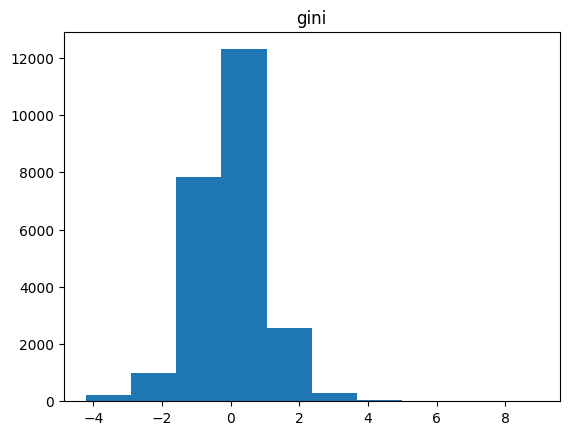

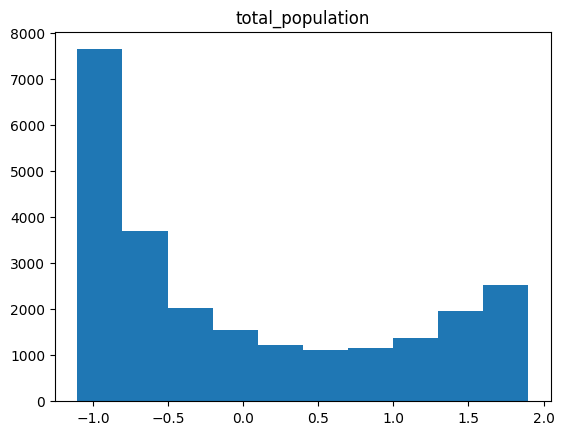

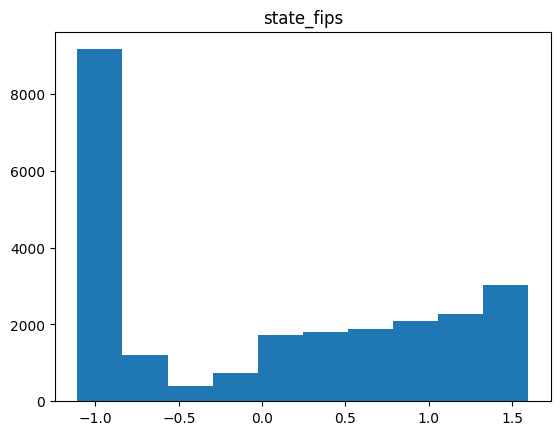

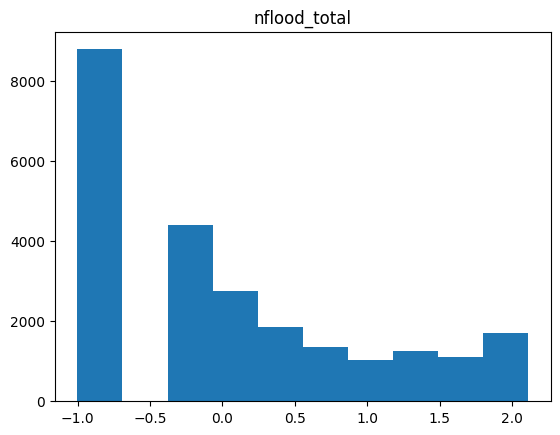

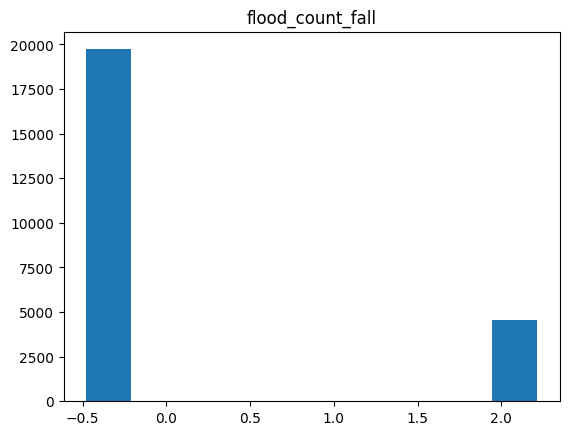

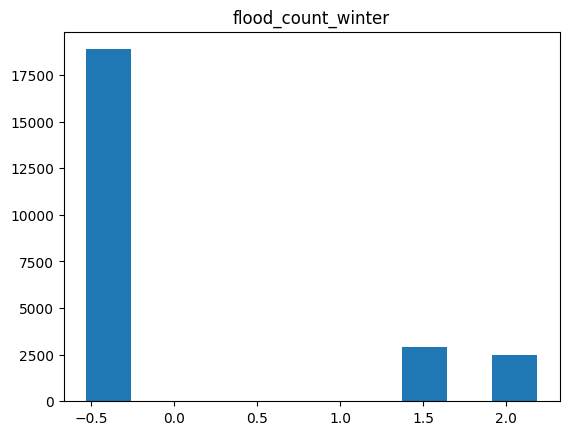

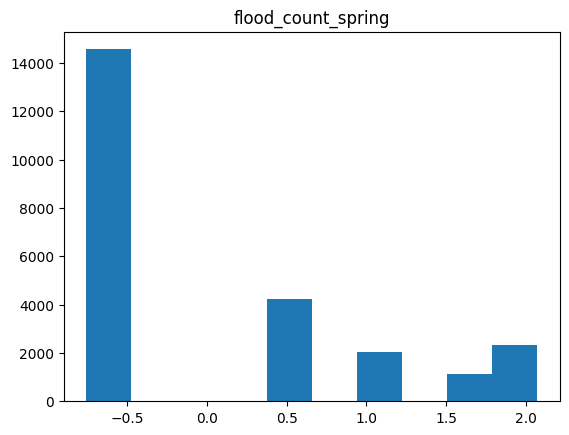

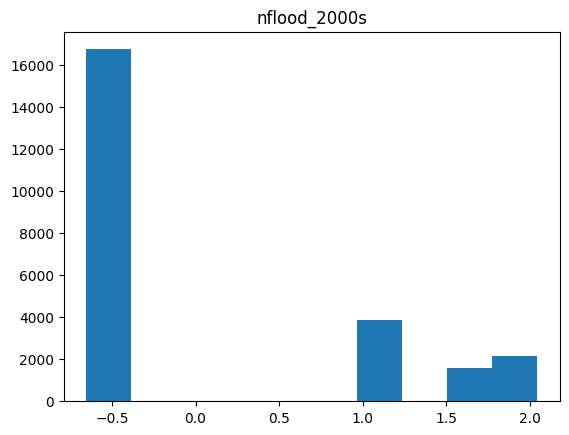

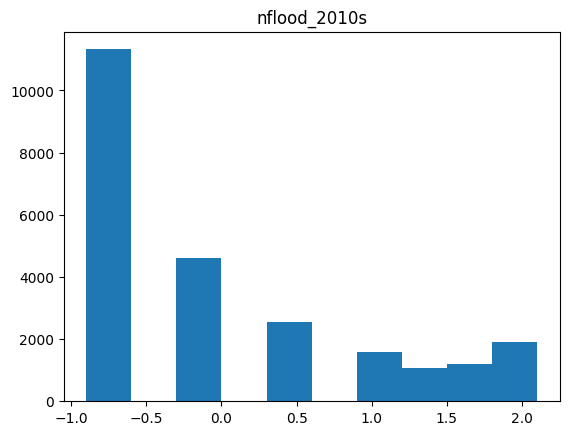

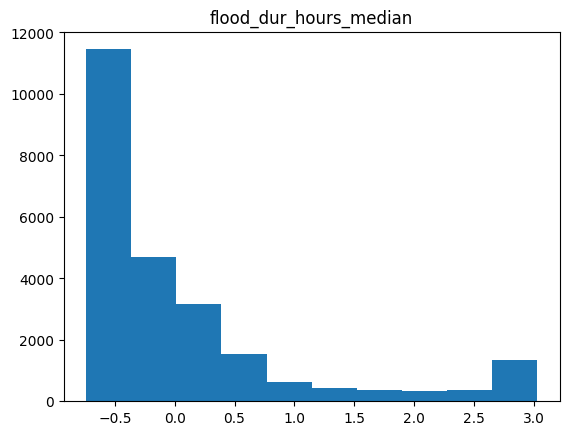

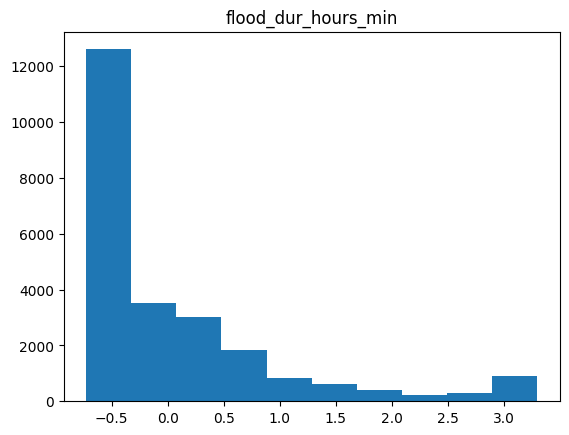

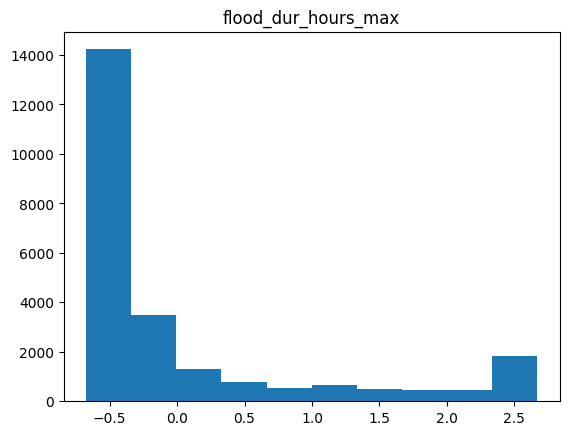

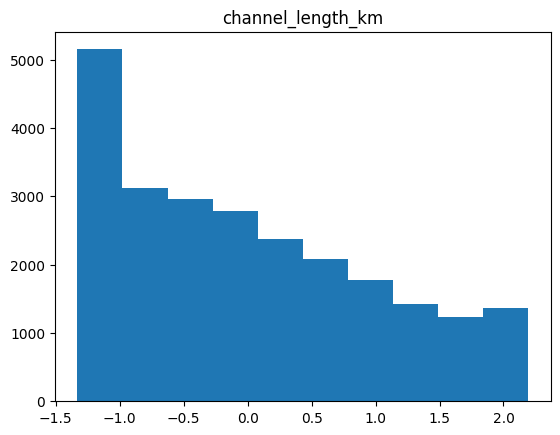

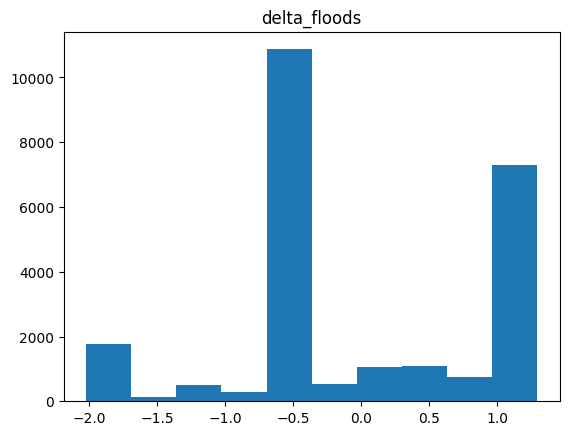

In [60]:
for n in X_train.columns:
    f, ax = plt.subplots(1, 1)
    ax.hist(X_train[n])
    ax.set_title(n)

#### Model Notes
Activation: 
- Sigmoid is really bad.
- 

In [65]:
model = Sequential()
n_col = len(X_train.columns)
model.add(Dense(200, activation='linear', input_shape=(n_col,)))
model.add(Dense(200, activation='relu', input_shape=(n_col,)))
model.add(Dense(200, activation='relu', input_shape=(n_col,)))

model.add(Dense(1))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, verbose=False)

/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step
MSE:  804437302.5480139


/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


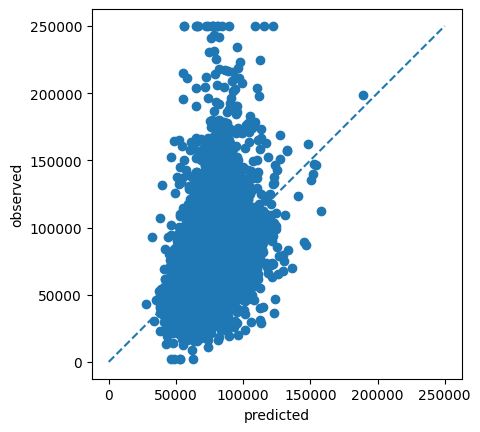

In [68]:
y_pred_test = model.predict(X_test)
y_pred_test = scaler_pipe.inverse_transform(y_pred_test)

f, ax = plt.subplots(1, 1)
ax.scatter(y_pred_test, y_test)
plt.plot([0, 250000], [0, 250000], linestyle='--')
ax.set_ylabel('observed')
ax.set_xlabel('predicted')
plt.axis('square')
print('MSE: ', mean_squared_error(y_test, y_pred_test))